In [126]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import os

In [127]:
spectograms = image_dataset_from_directory(
    "./trainData",
    image_size=(180, 180),
    batch_size=37)

Found 999 files belonging to 10 classes.


In [128]:
category_labels = os.listdir("./trainData")

In [129]:
num_batches = tf.data.experimental.cardinality(spectograms).numpy()

## Use num_batches - 2 batches for training, 1 batch for validation, 1 batch for testing
train = spectograms.take(num_batches - 2).cache()
remaining = spectograms.skip(num_batches - 2)
validation = remaining.take(1).cache()
test = remaining.skip(1).cache()

In [130]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

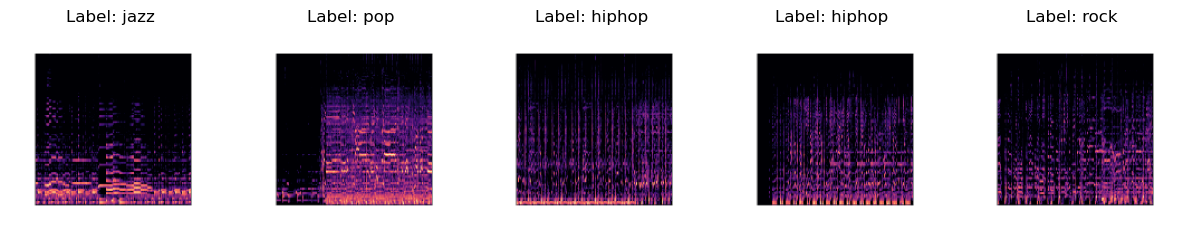

In [131]:
for images, labels in validation:
    num_images = images.shape[0]
    
    # Calculate the number of rows and columns for subplots
    num_rows = (num_images + 2) // 3  # Assuming 3 columns
    
    # Adjust figure size and layout
    plt.figure(figsize=(15, 5 * num_rows))
    
    # Plot each image in the batch on multiple rows
    for i in range(5):
        plt.subplot(num_rows, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Label: {category_labels[labels[i].numpy()]}")
        plt.axis("off")
    
    plt.show()

In [132]:
conv_base.trainable = False

inputs = keras.Input(shape=(180, 180, 3))
x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(inputs)
x = layers.Flatten()(x)
x = layers.Dense(256, activation = "relu")(x)
x = layers.Dense(256, activation = "relu")(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train,
    epochs = 50,
    validation_data = validation)

Epoch 1/50
25/25 [==============================] - 4s 102ms/step - loss: 30.3679 - accuracy: 0.2530 - val_loss: 4.7860 - val_accuracy: 0.2703
Epoch 2/50
25/25 [==============================] - 2s 81ms/step - loss: 3.4537 - accuracy: 0.3968 - val_loss: 4.1561 - val_accuracy: 0.3514
Epoch 3/50
25/25 [==============================] - 2s 81ms/step - loss: 2.4860 - accuracy: 0.4346 - val_loss: 1.9139 - val_accuracy: 0.4595
Epoch 4/50
25/25 [==============================] - 2s 81ms/step - loss: 2.0625 - accuracy: 0.4497 - val_loss: 1.9044 - val_accuracy: 0.3784
Epoch 5/50
25/25 [==============================] - 2s 82ms/step - loss: 2.0281 - accuracy: 0.4735 - val_loss: 1.6718 - val_accuracy: 0.4054
Epoch 6/50
25/25 [==============================] - 2s 81ms/step - loss: 1.5134 - accuracy: 0.5384 - val_loss: 1.4830 - val_accuracy: 0.5676
Epoch 7/50
25/25 [==============================] - 2s 82ms/step - loss: 1.3321 - accuracy: 0.6032 - val_loss: 1.0237 - val_accuracy: 0.5676
Epoch 8/50


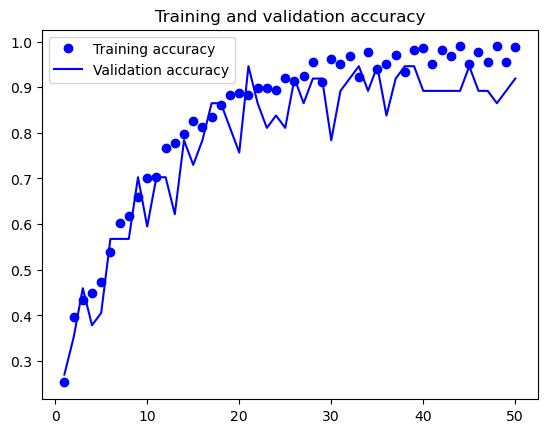

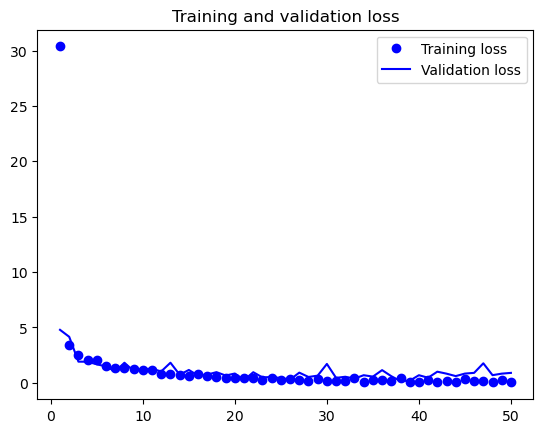

In [133]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [134]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

history = model.fit(
    train,
    epochs = 10,
    validation_data = validation)

Epoch 1/10


25/25 [==============================] - 3s 100ms/step - loss: 0.0276 - accuracy: 0.9859 - val_loss: 1.1473 - val_accuracy: 0.9459
Epoch 2/10
25/25 [==============================] - 2s 96ms/step - loss: 0.0139 - accuracy: 0.9957 - val_loss: 0.8095 - val_accuracy: 0.9459
Epoch 3/10
25/25 [==============================] - 2s 96ms/step - loss: 0.0128 - accuracy: 0.9935 - val_loss: 0.6425 - val_accuracy: 0.9189
Epoch 4/10
25/25 [==============================] - 2s 96ms/step - loss: 0.0089 - accuracy: 0.9968 - val_loss: 0.6658 - val_accuracy: 0.9189
Epoch 5/10
25/25 [==============================] - 2s 96ms/step - loss: 0.0193 - accuracy: 0.9946 - val_loss: 0.9054 - val_accuracy: 0.9189
Epoch 6/10
25/25 [==============================] - 2s 96ms/step - loss: 0.0138 - accuracy: 0.9978 - val_loss: 1.0347 - val_accuracy: 0.9189
Epoch 7/10
25/25 [==============================] - 2s 96ms/step - loss: 0.0072 - accuracy: 0.9978 - val_loss: 0.8853 - val_accuracy: 0.8919
Epoch 8/10
25/25 [=====

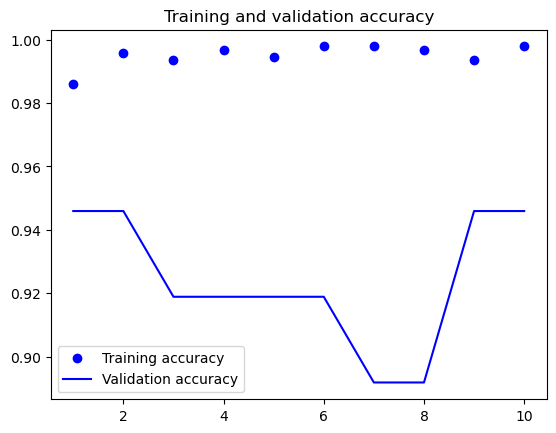

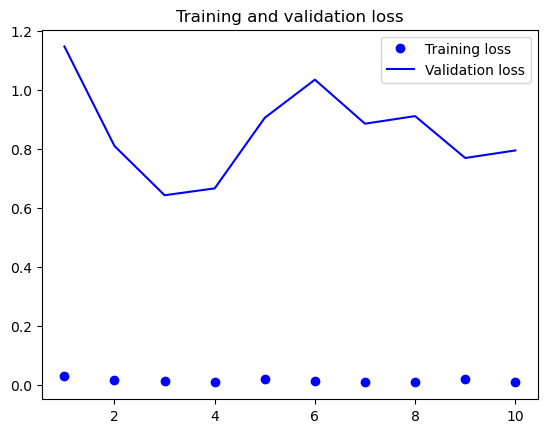

In [135]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [136]:
model.evaluate(test)

1/1 [==============================] - 3s 3s/step - loss: 0.6756 - accuracy: 0.9459


[0.675600528717041, 0.9459459185600281]

In [137]:
predictions_prob = model.predict(test)
predictions = np.argmax(predictions_prob, axis = 1)

ground_truth = [label for _, label in test.unbatch()]
ground_truth = tf.concat(ground_truth, axis = 0).numpy()  

accuracy = accuracy_score(ground_truth, predictions)
print("Accuracy of the model:", accuracy)

1/1 [==============================] - 0s 81ms/step
Accuracy of the model: 0.9459459459459459


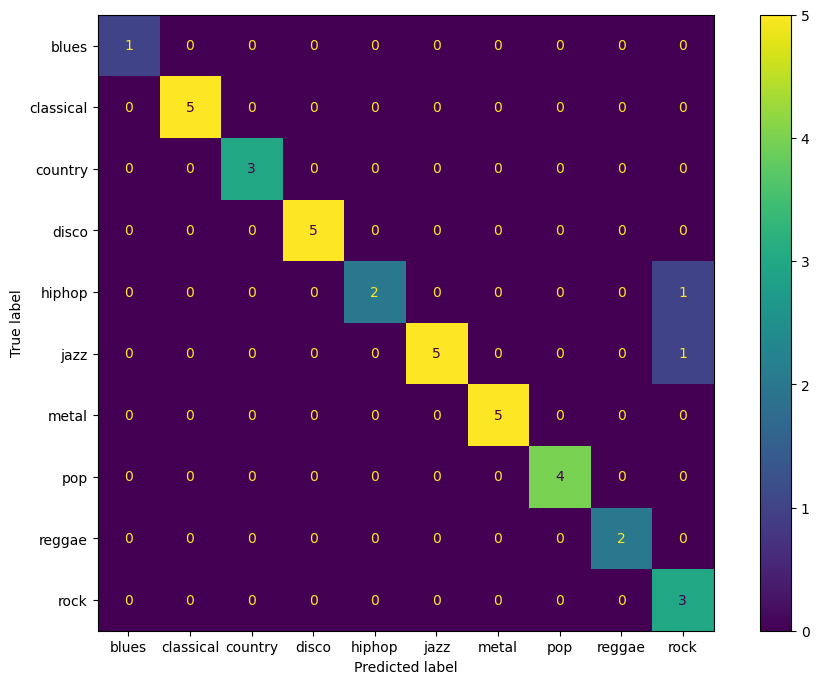

In [138]:
fig, ax = plt.subplots(figsize=(12,8))
conf_matrix = confusion_matrix(ground_truth, predictions)
ConfusionMatrixDisplay(conf_matrix, display_labels = category_labels).plot(ax = ax);